# Create Final Versions of the Plots for the Paper

Condense the results into fewer figures.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.ticker import MultipleLocator


BUSI_AGG_PATH = "../results/busi_individual_agg.csv"
BUSI_PATH = "../results/busi_individual.csv"
BUS_BRA_PATH = "../results/bus_bra_individual.csv"
BUS_BRA_BIRADS_PATH = "../results/bus_bra_birads_individual.csv"

BUSI_TRIVIAL_PATH = "../results/busi_trivial_augment_runs.csv"
BUS_BRA_TRIVIAL_PATH = "../results/bus_bra_trivial_augment_runs.csv"
BUS_BRA_BIRADS_TRIVIAL_PATH = "../results/bus_bra_birads_trivial_augment_runs.csv"

C0 = [0.19460784, 0.45343137, 0.63284314, 0.4]
C1 = [0.88186275, 0.50539216, 0.17303922, 0.4]

TRANSFORM_TO_LABEL = {
    "elastic_transform": "Elastic",
    "center_crop": "None",
    "saturation": "Saturation",
    "equalize": "Equalize",
    "vertical_flip": "Flip V.",
    "gaussian_blur": "Gauss. blur",
    "shear_x": "Shear X",
    "horizontal_flip": "Flip H.",
    "contrast": "Contrast",
    "brightness": "Brightness",
    "median_blur": "Median blur",
    "grid_distortion": "Grid distort",
    "random_crop": "Random crop",
    "translate_x": "Translate X",
    "translate_y": "Translate Y",
    "scaling": "Scale",
    "gaussian_noise": "Gauss. noise",
    "rotation": "Rotate",
    "shear_y": "Shear Y",
}

GEOM_ORDER = [
    "elastic_transform",
    "horizontal_flip",
    "vertical_flip",
    "grid_distortion",
    "random_crop",
    "rotation",
    "scaling",
    "shear_x",
    "shear_y",
    "translate_x",
    "translate_y",
]

PHOTO_ORDER = [
    "brightness",
    "contrast",
    "equalize",
    "gaussian_blur",
    "gaussian_noise",
    "median_blur",
    "saturation",
]

## Visualize Individual Augmentation Results

In [7]:
busi_agg_results_df = pd.read_csv(BUSI_AGG_PATH)
busi_results_df = pd.read_csv(BUSI_PATH)
bus_bra_results_df = pd.read_csv(BUS_BRA_PATH)
bus_bra_birads_results_df = pd.read_csv(BUS_BRA_BIRADS_PATH)

/tmp/ipykernel_15748/4082365353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["diff"] = plot_df["diff"] * 100
/tmp/ipykernel_15748/4082365353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["diff"] = plot_df["diff"] * 100
/tmp/ipykernel_15748/4082365353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

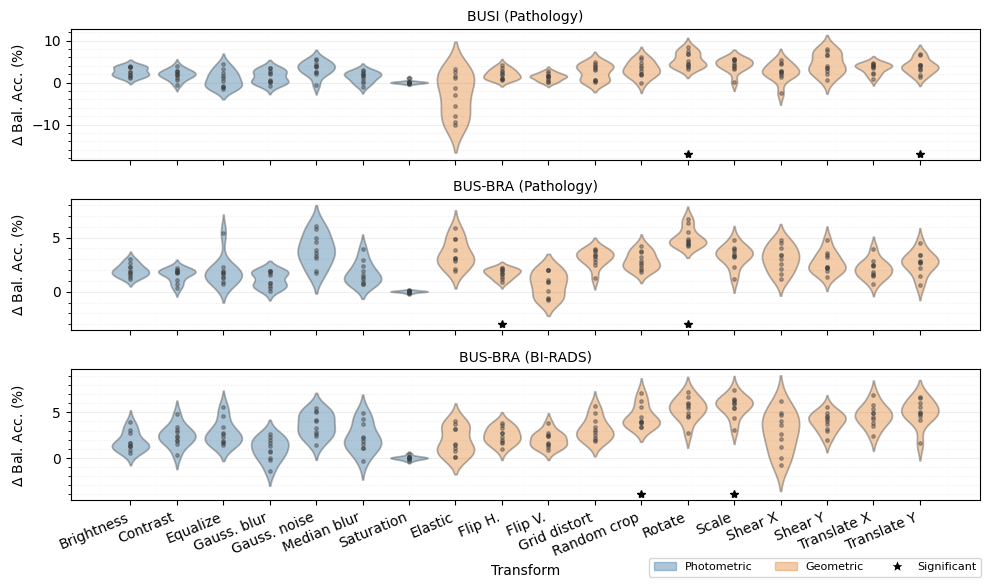

In [11]:
ordering = PHOTO_ORDER + GEOM_ORDER

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True)

for ax, (dataset, results_df) in zip(
    axes.flat,
    [
        ("BUSI (Pathology)", busi_results_df),
        ("BUS-BRA (Pathology)", bus_bra_results_df),
        ("BUS-BRA (BI-RADS)", bus_bra_birads_results_df),
    ],
):
    plot_df = results_df
    plot_df["type"] = plot_df["transform"].apply(
        lambda x: "Photometric" if x in PHOTO_ORDER else "Geometric"
    )
    plot_df = plot_df[plot_df["transform"] != "center_crop"]
    plot_df["diff"] = plot_df["diff"] * 100

    # Draw violin plots
    sns.violinplot(
        plot_df,
        ax=ax,
        x="transform",
        y="diff",
        hue="type",
        order=ordering,
        inner="point",
        density_norm="count",
        # cut=2,
    )
    for violin, alpha in zip(ax.collections, [0.4] * len(ax.collections)):
        violin.set_alpha(alpha)

    # Gridlines
    ax.yaxis.grid(True, which="major", color="#EEEEEE")
    ax.yaxis.grid(True, which="minor", color="#EEEEEE", linestyle=":")
    ax.set_axisbelow(True)

    # Significance markers, legend, minor gridlines
    match dataset:
        case "BUSI (Pathology)":
            ax.plot([12], [-17], marker="*", color="k")  # Rotate
            ax.plot([17], [-17], marker="*", color="k")  # Translate Y
            ax.legend().remove()
            ax.yaxis.set_major_locator(MultipleLocator(10))
            ax.yaxis.set_minor_locator(MultipleLocator(2))
        case "BUS-BRA (Pathology)":
            ax.plot([8], [-3], marker="*", color="k")  # Horizontal flip
            ax.plot([12], [-3], marker="*", color="k")  # Rotate
            ax.legend().remove()
            ax.yaxis.set_major_locator(MultipleLocator(5))
            ax.yaxis.set_minor_locator(MultipleLocator(1))
        case "BUS-BRA (BI-RADS)":
            ax.plot([11], [-4], marker="*", color="k")  # Random crop
            ax.plot([13], [-4], marker="*", color="k")  # Scale
            legend_elements = [
                Patch(color=C0, label="Photometric"),
                Patch(color=C1, label="Geometric"),
                Line2D(
                    [0],
                    [0],
                    marker="*",
                    color="w",
                    markerfacecolor="k",
                    label="Significant",
                    markersize=10,
                ),
            ]
            ax.legend(
                handles=legend_elements,
                loc="lower right",
                fontsize=8,
                ncols=3,
                bbox_to_anchor=(1.0075, -0.625),
            )
            ax.yaxis.set_minor_locator(MultipleLocator(1))

    # Axes
    ax.set_ylabel("$\Delta$ Bal. Acc. (%)")
    ax.set_xlabel("Transform")
    ax.set_xticks(
        ordering,
        labels=[TRANSFORM_TO_LABEL[x] for x in ordering],
        rotation=22.5,
        ha="right",
    )
    ax.set_title(dataset, fontsize=10)
    fig.align_ylabels(axes)

plt.tight_layout()
plt.savefig("../results/individual_effects_violins.pdf", bbox_inches="tight")
plt.show()

## Visualize Trivial Augment Results

In [2]:
busi_results_df = pd.read_csv(BUSI_TRIVIAL_PATH)
bus_bra_results_df = pd.read_csv(BUS_BRA_TRIVIAL_PATH)
bus_bra_birads_results_df = pd.read_csv(BUS_BRA_BIRADS_TRIVIAL_PATH)

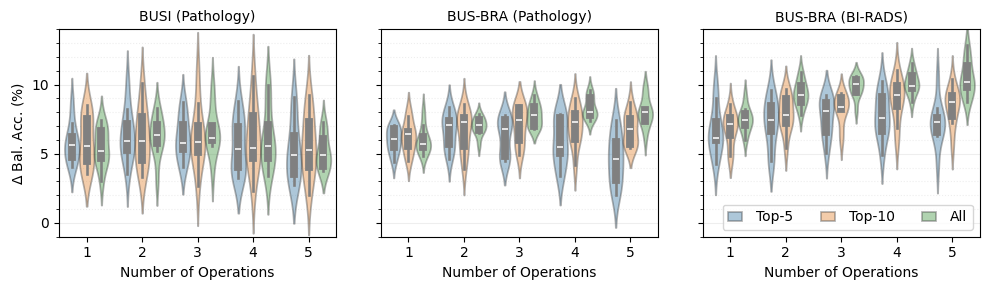

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.0), sharey=True)

for ax, (dataset, results_df) in zip(
    axes.flat,
    [
        ("BUSI (Pathology)", busi_results_df),
        ("BUS-BRA (Pathology)", bus_bra_results_df),
        ("BUS-BRA (BI-RADS)", bus_bra_birads_results_df),
    ],
):
    plot_df = results_df[
        results_df["augmentations"].isin(["all", "top5", "top10"])
    ].copy()
    plot_df["diff"] = plot_df["diff"] * 100

    # Draw violins
    sns.violinplot(
        plot_df,
        ax=ax,
        x="ops",
        y="diff",
        hue="augmentations",
        hue_order=["top5", "top10", "all"],
        order=sorted(plot_df["ops"].unique()),
        inner="box",
        density_norm="count",
        cut=2,
        inner_kws={
            "color": "grey",
        },
    )
    for violin, alpha in zip(ax.collections, [0.4] * len(ax.collections)):
        violin.set_alpha(alpha)

    # Gridlines
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.grid(True, which="major", color="#EEEEEE")
    ax.yaxis.grid(True, which="minor", color="#EEEEEE", linestyle=":")
    ax.set_axisbelow(True)

    # Significance markers and legend
    match dataset:
        case "BUSI (Pathology)":
            ax.legend().remove()
        case "BUS-BRA (Pathology)":
            ax.legend().remove()
        case "BUS-BRA (BI-RADS)":
            legend_elements = [
                Line2D(
                    [0],
                    [0],
                    marker="^",
                    color="w",
                    markerfacecolor=C0,
                    label="Fold 0",
                    markersize=8,
                ),
                Line2D(
                    [0],
                    [0],
                    marker="o",
                    color="w",
                    markerfacecolor=C1,
                    label="Fold 1",
                    markersize=8,
                ),
            ]
            legend_elements = ax.get_legend_handles_labels()[0]
            for x in legend_elements:
                x.set_alpha(0.4)
                x.set_label(x.get_label().title().replace("Top", "Top-"))
            ax.legend(
                handles=legend_elements, loc="lower right", ncols=3, handletextpad=0
            )
            for patch in ax.get_legend().get_patches():
                patch.set_width(patch.get_width() * 0.5)

    # Axes
    ax.set_ylabel("$\Delta$ Bal. Acc. (%)")
    ax.set_xlabel("Number of Operations")
    ax.set_title(dataset, fontsize=10)
    ax.set_ylim(-1, 14)

plt.tight_layout()
plt.savefig("../results/trivial_augment_violins.pdf", bbox_inches="tight")
plt.show()

## Visualize Trivial Augment Ablation Study Results

In [7]:
busi_results_df = pd.read_csv(BUSI_TRIVIAL_PATH)
bus_bra_results_df = pd.read_csv(BUS_BRA_TRIVIAL_PATH)
bus_bra_birads_results_df = pd.read_csv(BUS_BRA_BIRADS_TRIVIAL_PATH)

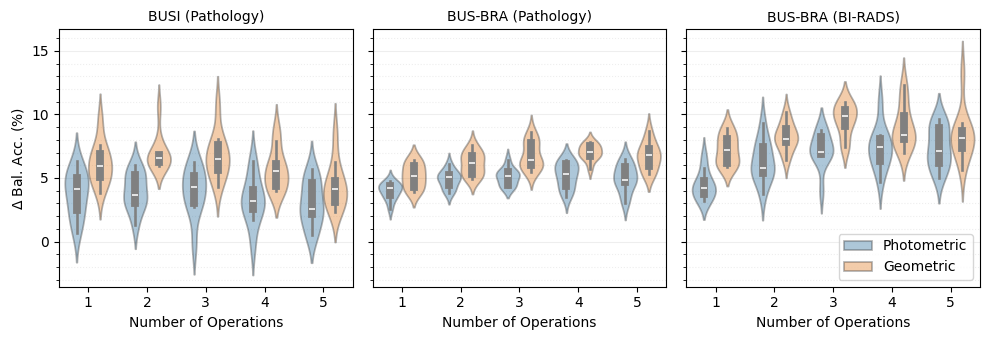

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), sharey=True)

for ax, (dataset, results_df) in zip(
    axes.flat,
    [
        ("BUSI (Pathology)", busi_results_df),
        ("BUS-BRA (Pathology)", bus_bra_results_df),
        ("BUS-BRA (BI-RADS)", bus_bra_birads_results_df),
    ],
):
    plot_df = results_df[
        results_df["augmentations"].isin(["photometric", "geometric"])
    ].copy()
    plot_df["diff"] = plot_df["diff"] * 100

    # Draw violins
    sns.violinplot(
        plot_df,
        ax=ax,
        x="ops",
        y="diff",
        hue="augmentations",
        hue_order=["photometric", "geometric"],
        order=sorted(plot_df["ops"].unique()),
        inner="box",
        density_norm="count",
        cut=2,
        inner_kws={
            "color": "grey",
        },
    )
    for violin, alpha in zip(ax.collections, [0.4] * len(ax.collections)):
        violin.set_alpha(alpha)

    # Gridlines
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.grid(True, which="major", color="#EEEEEE")
    ax.yaxis.grid(True, which="minor", color="#EEEEEE", linestyle=":")
    ax.set_axisbelow(True)

    # Significance markers and legend
    match dataset:
        case "BUSI (Pathology)":
            ax.legend().remove()
        case "BUS-BRA (Pathology)":
            ax.legend().remove()
        case "BUS-BRA (BI-RADS)":
            legend_elements = [
                Line2D(
                    [0],
                    [0],
                    marker="^",
                    color="w",
                    markerfacecolor=C0,
                    label="Fold 0",
                    markersize=8,
                ),
                Line2D(
                    [0],
                    [0],
                    marker="o",
                    color="w",
                    markerfacecolor=C1,
                    label="Fold 1",
                    markersize=8,
                ),
            ]
            legend_elements = ax.get_legend_handles_labels()[0]
            for x in legend_elements:
                x.set_alpha(0.4)
                x.set_label(x.get_label().title().replace("Top", "Top-"))
            ax.legend(handles=legend_elements, loc="lower right", ncols=1)

    # Axes
    ax.set_ylabel("$\Delta$ Bal. Acc. (%)")
    ax.set_xlabel("Number of Operations")
    ax.set_title(dataset, fontsize=10)

plt.tight_layout()
plt.savefig("../results/trivial_augment_ablation_violins.pdf", bbox_inches="tight")
plt.show()